# Golden Section Search 

Search minimum of a given range.
After each ieration, new range becomes narrower.

In [2]:
# %load cp_imports.py
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Use retina backend for better figures
%config InlineBackend.figure_format = 'retina'


1.6305160268927124


(0, 20.95)

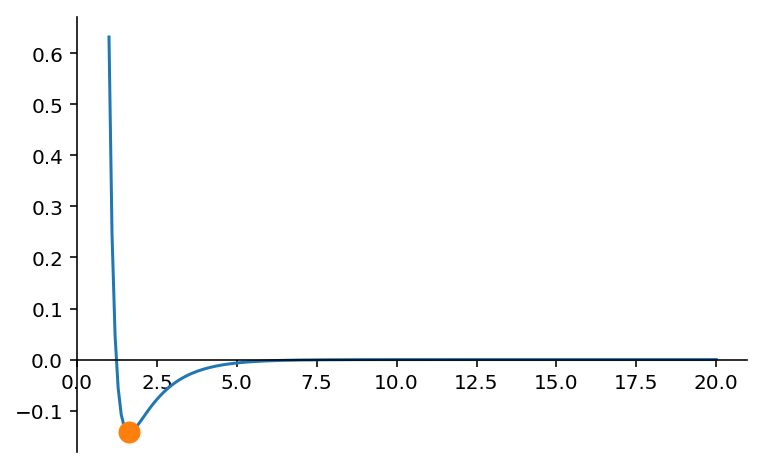

In [27]:
def molecule_potential(r, sigma=1.):
    return 1 * ((sigma/r)**6 - np.exp(-r/sigma))


def golden_search(f, a, b, tol):
    z = 1.618 
    c = b - (b - a)/z
    d = a + (b - a)/z
    
    fa, fb, fc, fd = f(a), f(b), f(c), f(d) 
    while abs(b - a) > tol:
        if fc > fd:
            a, fa = c, fc
            c, fc = d, fd
            d = a + (b - a)/z
            fd = f(d)
        else:
            b, fb = d, fd
            d, fd = c, fc
            c = b - (b - a)/z
            fc = f(c)
    return (b + a)/2


x = np.linspace(1, 20, 200)
x0 = golden_search(molecule_potential, .1, 2, 1e-6)
print(x0)

ax = plt.gca()
ax.plot(x, molecule_potential(x))
ax.plot(x0, molecule_potential(x0), marker="o", markersize=10)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_position(("data", 0))
ax.set_xlim(0, )


# Gradient-Descent 

\begin{equation}
    x_{k+1} = x_{k} - \gamma f'(x_k)
\end{equation}
$\gamma>0$ for minimum, $\gamma<0$ for maximum.

In [3]:
def gradient_descent(df, x0, gamma, tol=1e-6):
    x1 = x0 + 10 * tol
    while abs(x1 - x0) > tol:
        x0, x1 = x1, x0 - gamma * df(x0)
        
    return (x1 + x0) / 2


def mp_diff(x, sigma=1.):
    return -6 * sigma**6 / x**7 + np.exp(-x/sigma) / sigma


x0_g = gradient_descent(mp_diff, 2.5, 1)


In [48]:
molecule_potential(x0_g), molecule_potential(x0)

(-0.14260072034081564, -0.1426115958059438)

# Simulated Annealing

Like MCMC, use random process to construct a probability distribution.

9.828401552636697
After 62500 calls:
5.831280423246135


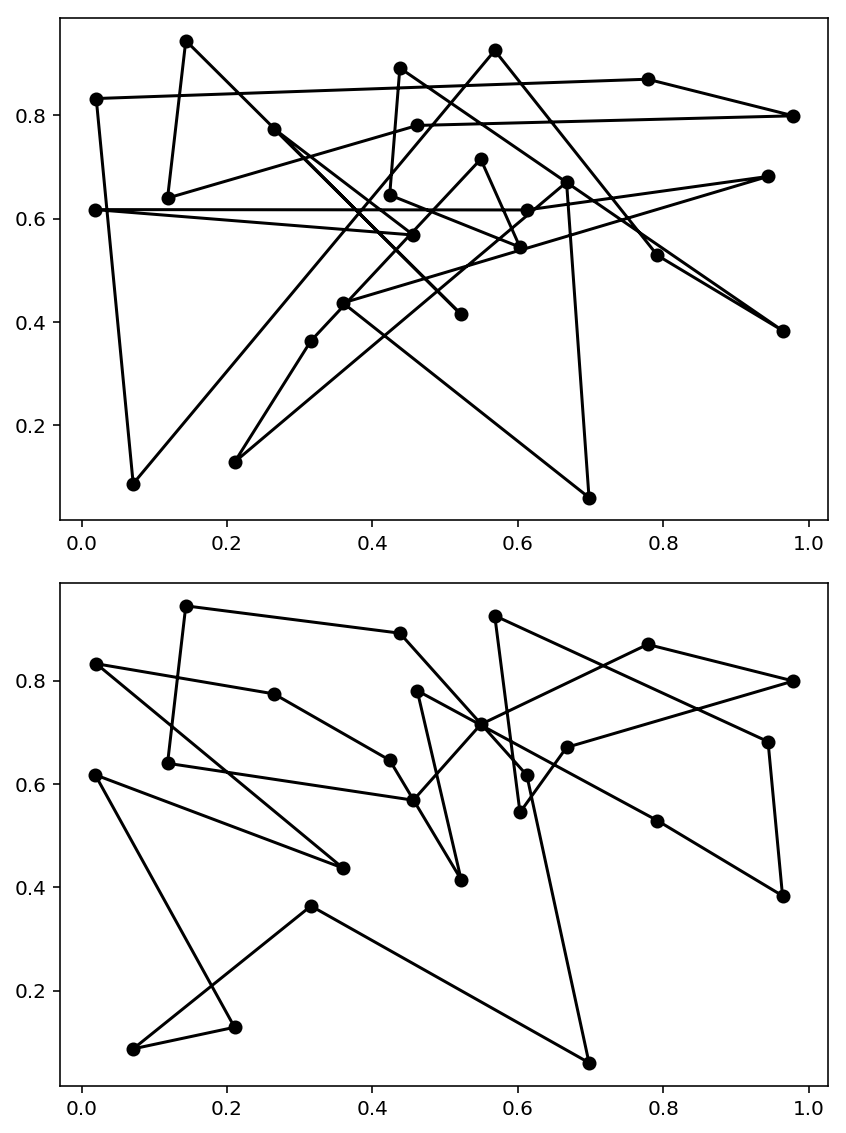

In [407]:
def annealing(f, proposal, T0, cooling=0.95):
    """
    f: function to be minimized
    proposal: iterator that generates next candidate
    T0: initial temperature
    cooling: cooling coefficient
    Tmin: the lower limit of T
    """
    x = next(proposal)
    annealing.call_counts = 0
    annealing.T = T0
    annealing.f = f(x)

    accept = True
    while accept:
        accept = False
        for _ in range(100 * len(x)):
            candidate = next(proposal)
            f_next = f(candidate)
            annealing.call_counts += 1
            if f_next <= annealing.f:
                # Correct direction, accept it and update values
                accept = True
                x = candidate
                annealing.f = f_next
            # Probably wrong direction, accept with a probability
            elif np.exp((annealing.f - f_next) / annealing.T) > np.random.rand():
                accept = True
                x = candidate
                annealing.f = f_next
        annealing.T *= cooling

    return x, annealing.f


def neighbour(n=25):
    # Create n 2-D values between 0~1 as town's position
    np.random.seed(0)
    towns = np.random.rand(n, 2)
    while True:
        yield towns
        r1, r2 = np.random.choice(range(n), 2)
        new_towns = towns.copy()
        new_towns[[r1, r2]] = towns[[r2, r1]]
        towns = new_towns
        np.random.shuffle(towns)


def distance_2D(arr):
    dis = 0
    for i in range(len(arr) - 1):
        dis += (np.sum(arr[i + 1] - arr[i]) ** 2) ** 0.5
    dis += np.sum((arr[0] - arr[-1]) ** 2) ** 0.5

    return dis


arr = neighbour(25)
initial_route = next(arr)

minimum_route, _ = annealing(distance_2D, arr, 5*distance_2D(initial_route), cooling=0.8)

print(distance_2D(initial_route))
print(f"After {annealing.call_counts} calls:")
print(distance_2D(minimum_route))

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6, 8))
axs[0].plot(initial_route[:, 0], initial_route[:, 1], marker='o', color="black")
axs[0].plot(initial_route[[-1, 0], 0], initial_route[[-1, 0], 1], color="black")
axs[1].plot(minimum_route[:, 0], minimum_route[:, 1], marker='o', color="black")
axs[1].plot(minimum_route[[-1, 0], 0], minimum_route[[-1, 0], 1], color="black")
fig.tight_layout()


In [349]:
test_generator = create_array(20)

In [388]:
(next(test_generator) == next(test_generator)).all()

True